# 아이유팬이 좋아할 만한 다른 아티스트 찾기

## 1. 들어가며

- 머신러닝 어플리케이션 중 가장 상업적인 성공을 거둔 것으로 평가받고 있는 **추천시스템(Recommender System)**에 대해 알아보려고 함
- 어느덧 추천시스템은 우리 생활 깊숙이 들어와 있음
- 유튜브, 넷플릭스 등 동영상 플랫폼이 기가막히게 내가 좋아할 만한 콘텐츠를 찾아서 자동으로 플레이해 주고 있음
- 아마존, 쿠팡 온라인 쇼핑 사이트에서도 내 취향에 맞는 상품추천을 쉽게 접할 수 있음
- 페이스북, 인스타그램 같은 SNS는 말할 것도 없고, 어쩌면 느끼지도 못한 사이에 뉴스나 광고까지도 추천시스템의 원리가 숨어들어 있음
- 이런 추천시스템의 원리를 한 문장으로 줄인다면 **나와 비슷한 다른 사용자들이 좋아하는 것과 비슷한 것을 내게 추천해 준다**일 것
- 하지만 어떤 사용자들이 나와 비슷한지를 어떻게 알 수 있을까?
- 또 어떤 상품이나 정보가 서로 유사한지는 어떻게 알 수 있는 걸까?
- 이번 노드에서 추천시스템의 기본 원리를 파악해 보고 나만의 추천시스템을 만들 수 있는 멋진 아이디어 떠올려 보기

### 실습 목표
- 추천시스템의 개념과 목적을 이해
- Implicit 라이브러리를 활용하여 Matrix Factorization(이하 MF) 기반의 추천 모델을 만들어 보기
- 음악 감상 기록을 활용하여 비슷한 아티스트를 찾고 아티스트를 추천해 봄
- 추천 시스템에서 자주 사용되는 데이터 구조인 CSR Matrix을 익힘
- 유저의 행위 데이터 중 Explicit data와 Implicit data의 차이점 익히기
- 새로운 데이터셋으로 직접 추천 모델 만들어 보기

### 목차
1. 들어가며
2. 데이터 탐색하기와 전처리
3. 사용자의 명시적/암묵적 평가
4. Matrix Factorization(MF)
5. CSR(Compressed Sparse Row) Matrix
6. MF 모델 학습하기
7. 비슷한 아티스트 찾기 + 유저에게 추천하기
8. 프로젝트 - MovieLens 영화 추천 실습

## 2. 추천시스템이란게 뭔가요?

- 현재 온라인 콘텐츠 서비스에서 데이터분석과 AI기술을 접목한 추천시스템의 활용은 이제 선택이 아닌 필수
- 우리가 흔히 사용하고 있는 음원 서비스를 예로 들어보기
- 아래 글을 읽어보면 이미 **추천시스템을 통한 개인화**가 서인스 전면으로 나섰음을 볼 수 있음
- [치열한 음원 큐레이션 서비스 경쟁](https://blog.naver.com/businessinsight/222191549425)
- 유튜브, 애플뮤직, 멜론 등 음원 서비스 제공자들은 수많은 유저들이 어떤 아티스트의 노래를 들었는지에 대한 광범위한 데이터를 축적하고 있음
- 이러한 빅데이터가 '정확한 추천'의 원동력이 되고 있다는 것은 어렴풋이 짐작할 수 있을 것
- 그러나 그 **추천의 원리**가 어떤 것인지 좀 더 구체적으로 파악하고 싶다면 아래 링크의 글을 읽어본 후 이어지는 질문에 답변해 보기
- [콘텐츠 추천 알고리즘의 진화](http://www.kocca.kr/insight/vol05/vol05_04.pdf)

- Q1. 협업 필터링(Collaborative Filtering) 방식과 콘텐츠 기반 필터링(Contents-based Filtering) 방식의 차이점
- A1. **협업 필터링**은 다수의 사용자의 아이템 구매 이력 정보만으로 사용자간 유사성 및 아이템 간 유사성을 파악하지만, **콘텐츠 기반 필터링**은 아이템의 고유의 정보를 바탕으로 아이템 간 유사성을 파악. 협업 필터링에서는 **아이템과 사용자 간의 행동 또는 관계**에만 주목할 뿐 아이템 자체의 고유한 속성에 주목하지 않음. 콘텐츠 기반 필터링에서는 **아이템 자체의 속성**에만 주목하고 **사용자와 아이템 간의 관련성**에는 주목하지 않음
- Q2. 다수의 사용자의 판단을 기반으로 정확한 추천을 가능하게 하는 추천시스템의 핵심 근간은 협업 필터링입니다만, 협업 필터링을 바로 사ㅇ용할 수 없게 만드는 3가지 제약 조건은 무엇일까요?
- A2. 첫번째로 시스템이 충분한 정보를 모으지 못한 사용자나 아이템애 대한 추론을 할 수 없는 상태인 콜드 스타트(Cold Start) 상황. 두 번째로는 계산량이 너무 많아 추천의 효율이 떨어지는 상황. 세 번째로는 롱테일의 꼬리 부분, 즉 사용자의 관심이 저조한 항목의 정보가 부족하여 추천에서 배제되는 상황
- Q3. 유튜브 뮤직의 첫화면에서 처음 접속한 사용자에게 좋아하는 아티스트 5명 이상의 정보를 요구하는 이유는 무엇일까요?
- A3. 처음 접속한 사용자라면 이 사용자에 대한 아무런 초기 정보가 없는 상황이어서 사용자 기반 추천을 전혀 할 수 없어 콘텐츠 기반 필터링 방식의 추천만 가능. 이를 보완하여 **처음부터 사용자 특성에 따른 맞춤헝 서비스 제공**하기 위함. 
- 사용자 맞춤형 추천을 제공하지 못한다면 모든 초기 사용자에게 같은 화면을 제시할 수밖에 없는데, 이러면 모든 사용자들이 처음 추천받은 콘텐츠 위주로만 시청하게 되어 추천시스템이 빠지기 쉬운 **필터 버블**의 문제를 야기하거나, **추천의 다양성을 저해**할 수 있는 위험이 생김
    - 필터 버블? 추천 시스템이 고도화될수록 사용자의 입맛에 맞는 정보만 제공되고 나멎 정보는 감추어지는 위험이 생기는 것. 사용자가 전체 정보를 볼기회를 박탈당할 수도 있다는 의미

- 추천시스템은 아래와 같은 상황일 때, 유저가 소비할만한 아이템을 예측하는 모델
> 1. 아이템은 많고
> 2. 유저의 취향은 다양할 때

- 몇 가지 실제 사례를 보면,
>유튜브: 동영상이 매일 엄청나게 많이 올라오고 유저의 취향(게임 선호, 뷰티 선호, 지식 선호, 뉴스 선호)이 다양<br>
>페이스북: 포스팅되는 글이 엄청 많고 유저가 관심 있는 페이지, 친구, 그룹은 전부 다름<br>
>아마존: 카테고리를 한정해도 판매 품목이 엄청 많고 좋아하는 브래드, 구매 기준이 다양

- 아티스트는 수없이 많고 새로운 아티스트가 계속 나오기 때문에, 유튜브 같은 추천 기반의 미디어 회사들은 꾸준히 아이템이 되는 아티스트 정보를 자동으로 수집하고, 사용자들이 아티스트를 선택한 정보를 업데이트하여 축적하고 있음. 이렇게 쌓인 방대한 데이터가 정확한 협업 필터링을 위한 기반이 됨
- 이렇게 쌓인 데이터 사례 중 하나를 활용하여 **유저가 좋아하는 특정 아티스트와 유사한 다른 아티스트를 추천**하는 추천시스템을 만들어 볼려고 함
- [Last.fm](https://www.last.fm/)에서는 어떤 유저가 특정 아티스트의 노래를 몇 번이나 들었는지에 대한 [데이터](http://ocelma.net/MusicRecommendationDataset/lastfm-360K.html)를 제공하고 있음
- 2010년에 미국에서 서비스되고 있는 spotify에서 발생한 데이터이기 때문에 생소한 아티스트가 많을 수 있음
- 오늘 사용하게 될 데이터셋은 아북을 풀기 전에 543MB, 압축을 풀고 나면 1.6GB가 넘어가는 꽤 큰 용량을 자랑
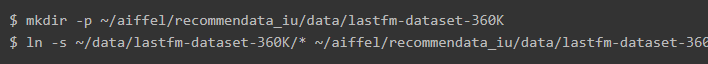
- 오늘 사용하게 될 미국 데이터로는 '아이유팬이 좋아할 만한 다른 아티스트'를 추천할 수는 없음
- 하지만 최근에 카카오에서 학술용으로만 공개한 [멜론 데이터](https://arena.kakao.com/c/7)를 활용하면 아이유와 관련된 추천 할 수 있을 것

## 3. 데이터 탐색하기와 전처리

### 데이터 준비

- 1.6Gb가 넘어가는 데이터를 열어서 Pandas를 활용해 몇가지 확인 및 전처리를 진행
- 다룰 데이터는 그동안 흔히 보던 'csv(Comma-Separated Values)' 파일이 아니고 'tsv(Tab-Seperated Values)' 파일
- tsv 파일은 tab('\t)'문자를 활용한 것
- 이런 텍스트 파일은 Pandas의 read_csv 메소드로도 충분히 파싱해서 열어볼 수 있음
- [데이터셋 홈페이지](http://ocelma.net/MusicRecommendationDataset/lastfm-360K.html)
- ```python
more ~/aiffel/recommendata_iu/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv
```

In [1]:
# Pandas 활용해 데이터 열어보기
# 위 데이터에는 컬럼명이 포함되어 있지 않으므로, 아래와 같이 col_names에 적절히 컬럼명 지정
import pandas as pd
import os

fname = os.getenv('HOME') + '/aiffel/recommendata_iu/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
# 임의로 지정한 컬럼명
col_names = ['user_id', 'artist_MBID', 'artist', 'play']
# set = '\t'로 주어야 tsv 열 수 있음
data = pd.read_csv(fname, sep = '\t', names = col_names)
data.head(10)

,user_id,artist_MBID,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,8bfac288-ccc5-448d-9573-c33ea2aa5c30,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,6531c8b1-76ea-4141-b270-eb1ac5b41375,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,21f3573f-10cf-44b3-aeaa-26cccd8448b5,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,c5db90c4-580d-4f33-b364-fbaa5a3a58b5,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,0639533a-0402-40ba-b6e0-18b067198b73,lunachicks,403


In [2]:
# artist_MBID 항목은 우리의 관심사가 아님 -> 제거
# 사용하는 컬럼만 남기고 제거
using_cols = ['user_id', 'artist', 'play']
data = data[using_cols]
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [3]:
# 검색을 쉽게하기 위해 아티스트 문자열을 소문자로 바꾸기
data['artist'] = data['artist'].str.lower()
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [4]:
# 첫 번째 유저가 어떤 아티스트 노래 듣는지 확인
condition = (data['user_id'] == data.loc[0, 'user_id'])
data.loc[condition]

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


### 데이터 탐색

- 추천 모델을 만들기 전에 데이터의 기본적인 정보 보고 가기. 아래 항목들을 확인
    - 유저수, 아티스트 수, 인기 많은 아티스트
    - 유저들이 몇 명의 아티스트를 듣고 있는지에 대한 통계
    - 유저 play 횟수 중앙값에 대한 통계
- (참고) pandas.DataFrame.nunique()은 특정 컬럼에 포함된 유니크한 데이터의 개수를 알아보는데 유용

In [5]:
# 유저 수
data['user_id'].nunique()

358868

In [6]:
# 아티스트 수
data['artist'].nunique()

291346

In [7]:
# 인기 많은 아티스트
artist_count = data.groupby('artist')['user_id'].count()
artist_count.sort_values(ascending = False).head(30)

artist
radiohead                77254
the beatles              76245
coldplay                 66658
red hot chili peppers    48924
muse                     46954
metallica                45233
pink floyd               44443
the killers              41229
linkin park              39773
nirvana                  39479
system of a down         37267
queen                    34174
u2                       33206
daft punk                33001
the cure                 32624
led zeppelin             32295
placebo                  32072
depeche mode             31916
david bowie              31862
bob dylan                31799
death cab for cutie      31482
arctic monkeys           30348
foo fighters             30144
air                      29795
the rolling stones       29754
nine inch nails          28946
sigur rós                28901
green day                28732
massive attack           28691
moby                     28232
Name: user_id, dtype: int64

In [8]:
# 유저별 몇 명의 아티스트를 듣고 있는지에 대한 통계
user_count = data.groupby('user_id')['artist'].count()
user_count.describe()

count    358868.000000
mean         48.863234
std           8.524272
min           1.000000
25%          46.000000
50%          49.000000
75%          51.000000
max         166.000000
Name: artist, dtype: float64

In [9]:
# 유저별 play 횟수 중앙값에 대한 통계
user_median = data.groupby('user_id')['play'].median()
user_median.describe()

count    358868.000000
mean        142.187676
std         213.089902
min           1.000000
25%          32.000000
50%          83.000000
75%         180.000000
max       50142.000000
Name: play, dtype: float64

### 모델 검증을 위한 사용자 초기 정보 세팅

- 본인의 음악 취향과 가장 유사한 아티스트 추천받고 싶음
- 유튜브 뮤직 등 추천시스템은 이를 위해서 처음 가입하는 사용자의 취향과 유사한 아티스트 정보를 5개 이상 입력받는 과정을 거치게 하는 경우가 많음
- 동일한 과정이 필요. 우리가 만든 추천시스템의 추후 검증 과정을 위해 '나는 A를 좋아한다.'라는 정보를 위 데이터셋에 5개 이상 추가해 주어야 함
- 아래와 같이 좋아하는 유명한 아티스트들을 기존의 데이터에 추가해서 넣었음

In [10]:
# 본인이 좋아하는 아티스트 데이터로 바꿔서 추가. 단 이름은 꼭 데이터셋에 있는 것과 동일하게 맞추기
my_favorite = ['black eyed peas', 'maroon5', 'jason mraz', 'coldplay', 'beyonce']

# 'zimin'이라는 user_id가 위 아티스트의 노래를 30회식 들었다고 가정
my_playlist = pd.DataFrame({'user_id': ['zimin']*5, 'artist':my_favorite, 'play':[30]*5})

# user_id에 'zimin'이라는 데이터가 없다면
if not data.isin({'user_id':['zimin']})['user_id'].any():
# 위에 임의로 만든 my_favorite 데이터를 추가
    data = data.append(my_playlist)

# 잘 추가되었는지 확인
data.tail(10)

,user_id,artist,play
17535650,"sep 20, 2008",turbostaat,12
17535651,"sep 20, 2008",cuba missouri,11
17535652,"sep 20, 2008",little man tate,11
17535653,"sep 20, 2008",sigur rós,10
17535654,"sep 20, 2008",the smiths,10
0,zimin,black eyed peas,30
1,zimin,maroon5,30
2,zimin,jason mraz,30
3,zimin,coldplay,30
4,zimin,beyonce,30


### 모델에 활용하기 위한 전처리(실습)

- 사람이 태어나면 주민등록번호가, 학교에 가면 출석번호가 있듯이 데이터의 관리를 쉽게 하기 위해 번호를 붙여주고 싶음
- 우리가 다루는 데이터에서는 user와 artist 각각에 번호 붙이고 싶음
- 보통 이런 작업을 **indexing**이라고 함
- 추천시스템, 자연어처리에서 자주 하는 작업들
- (참고) pandas.DataFrame.unique()은 특정 컬럼에 포함된 유니크한 데이크만 모아줌. indexing 작업을 위해 매우 유용

In [11]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = data['user_id'].unique()
artist_unique = data['artist'].unique()

# 유저, 아티스트 indexing하는 코드 idx는 index의 약자
user_to_idx = {v:k for k,v in enumerate(user_unique)}
artist_to_idx = {v:k for k,v in enumerate(artist_unique)}

In [12]:
# 인덱싱이 잘 되었는지 확인

# 358869 명의 유저 중 마지막으로 추가된 유저이니 358868이 나와야 함
print(user_to_idx['zimin'])
print(artist_to_idx['black eyed peas'])

358868
376


In [13]:
# indexing 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16을 참고

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 보기
# 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN가 될테니 dropna()로 제거
temp_user_data = data['user_id'].map(user_to_idx.get).dropna()
# 모든 row가 정상적으로 인덱싱되었다면
if len(temp_user_data) == len(data):
    print('user_id column indexing OK!!')
    # data['user_id']을 인덱싱된 Series로 교체
    data['user_id'] = temp_user_data
else:
    print('user_id column indexing Fail!!')
    
# artist_to_idx을 통해 artist 컬럼도 동일한 방식으로 인덱싱
temp_artist_data = data['artist'].map(artist_to_idx.get).dropna()
if len(temp_artist_data) == len(data):
    print('artist column indexing OK!!')
    data['artist'] = temp_artist_data
else:
    print('artist column indexing Fail!')
    
data

user_id column indexing OK!!
artist column indexing OK!!


,user_id,artist,play
0,0,0,2137
1,0,1,1099
2,0,2,897
3,0,3,717
4,0,4,706
...,...,...,...
0,358868,376,30
1,358868,270115,30
2,358868,3746,30
3,358868,62,30


## 4. 사용자의 명시적/암묵적 평가

- 추천시스템은 사용자들이 아이템을 얼마나 선호하는지를 모델링하기를원함
- 그러자면 사용자의 아이템 선호도를 말해 주는 유저 행동 데이터셋이 필요
- 만약 우리 데이터가 **좋아요**나 **별점**처럼 선호도를 명시적(explicit)으로 나타내는 것이라면 좋겠지만, 지금 우리가 가지고 있는 데이터는 사용자가 아티스트의 곡을 몇 번 플레이했나 하는 것뿐
- 이렇게 서비스를 사용하면서 자연스럽게 발생하는 암묵적(implicit)인 피드백도 사용자의 아이템에 대한 평가를 알 수 있는 단서가 될 것
- 명시적/암묵적 피드벡 데이터셋에 대해 잘 정리된 아래의 링크의 글을 읽어본 후 질문에 답해보기
- [Explicit vs.Implicit Feedback Datasets](https://orill.tistory.com/entry/Explicit-vs-Implicit-Feedback-Datasets?category=1066301)

- Q5. 암묵적 평가가 될 수 있는 데이터의 사례에는 어떤 것이 있을지 생각해보기(예: 플레이 횟수, 플레이 시간 등)
- A5. 예시로 든 플레이 횟수, 플레이 시간 이외에도 클릭 수, 구매 여부, 플레이 스킵 여부, 검색 기록, 방문 페이지 이력, 구매 내역, 심지어 마우스 움직임 기록도 암묵적 평가 데이터셋이 될 수 있음
- Q6. 어떤 유저가 아티스트의 곡을 1번만 들었다는 것의 의미 생각해보기. 유저는 이 아티스를 좋아하는 걸까요? 싫어하는 걸까요? 이 유저에게 아티스트와 관련돤 사람을 추천을 할까?
- A6. 명확한 정답 존재하지 않음. 어떤 유저는 1번 듣고 별로라고 생각했을 수도 있고, 어떤 유저는 다시 듣고 싶지만 가수의 이름을 잊어버렸을 수도 있음. 이런 애매한 암묵적 데이터야말로 도매인 지식과 직관이 활용되어야 하는 영역

In [14]:
# 데이터셋에서 1회만 플레이한 데이터의 비율

# 1회만 play한 데이터의 비율을 보는 코드
only_one = data[data['play']<2]
one, all_data = len(only_one), len(data)
print(f'{one}, {all_data}')
# f-format에 대한 설명은 https://bit.ly/2DTLqYU
print(f'Ratio of only_one over all data is {one/all_data:2%}')

147740, 17535660
Ratio of only_one over all data is 0.842512%


- 앞으로 만들어갈 모델에서는 암묵적 데이터의 해석을 위해 다음과 같은 규칙 적용할 것
    - 1. 한 번이라도 들었으면 선호한다고 판단
    - 2. 많이 재생한 아티스트에 대한 가중치를 주어서 더 확실히 좋아한다고 판단

## 5. Matrix Factorization(MF)

- 데이터가 준비되었으니 이제 모델을 만들 차례
- 아래 그램의 왼쪽에서 보는 것처럼, 우리는 m명의 사용자들이 n명의 아티스트에 대해 펴아한 데이터를 포함한 (m, n) 사이즈의 평가행렬(Rating Matrix)을 만들 것
- 행렬 중 일부는 데이터가 채워져 있지만, 나머지 부분은 데이터가 비어 있음
- 앞에서 살펴보았던 추천시스템의 '협업 필터링(Collaborative Filtering)'이란 결국은 이런 평가행렬을 전제로 하는 것
- 만약 이 평가행렬의 비어 있는 부분을 포함한 완벽한 정보를 얻을 수만 있다면(모든 사용자의 모든 아이템에 대한 선호도를 다 파악한 셈이니) 그야말로 완벽한 추천이 가능해질 것
- 추천 시스템의 다양한 모델 중 'Matrix Factorization(MF, 행렬분해) 모델 사용
- MF 모델은 2006년 Netflix에서 백만달러의 상금을 걸고 개최한 자사 추천시스템의 성능을 10% 이상 향상시키는 챌린지를 계기로 알려지게 됨
- 기본 아이디어는 아래 그림과 같음
- (m,n) 사이즈의 행렬 R을 (m,k) 사이즈의 행렬 P와 (k,n) 사이즈의 행렬 Q로 분해한다면 R이란 그저 P와 Q의 행렬곱으로 표현 가능할 수 있다는 간단한 아이디어
- 대체로 k는 m이나 n보다 훨씬 작은 값이기 때문에 계산량 측면으로도 훨씬 유리
- 하지만, 아이디어의 단순함에도 불구하고 MF 모델은 성능이 준수하고 Scalability가 좋아서 많이 사용되는 모델
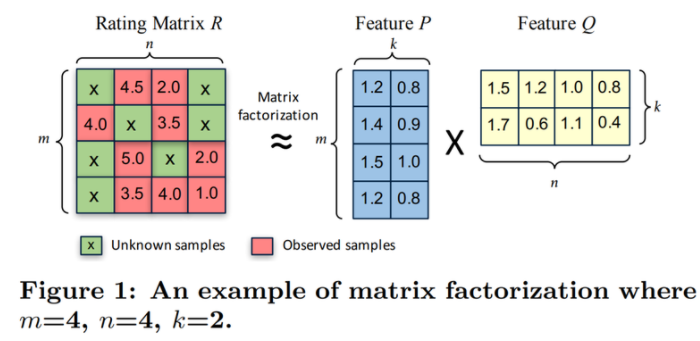

- 아래 그림은 위에 소개한 MF 모델의 개요도와 크게 다를 것은 없음
- 단지, MF 모델을 사용자에게 영화를 추천하는 모델에 대입해서 그려 보았다는 정도의 차이가 있음
- 위 그림 방식으로 말하자면 m = 4, n = 5, k= 2인 MF 모델
- 위에서 MF 모델은 큰 평가행렬 R을 2개의 Feature Matrix P와 Q로 분해한다고 하였음
- 무엇의 Feature일까? (m,k)사이즈의 Feature Matrix P는 k 차원의 벡터를 사용자 수만큼 모아놓은 행렬
- 그렇다면 아래 그림에서 첫 번째 벡터 P0 = (1, 0.1)은 바로 빨간 모자를 쓴 첫 번째 **사용자의 특성(Feature)벡터**가 됨
- 같은 방식으로 Q 행렬의 첫번째 벡터 Q0 = (0.9, -0.2)는 해리포터 **영화의 특성 벡터**가 되는 것
- MF 모델은 이 두 벡터를 내적해서 얻어지는 0.88이 바로 R0.0으로 정의되는 사용자의 영화 선호도로 보는 모델
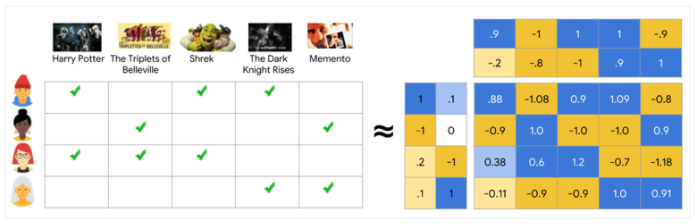
- 모델의 목표는 모든 유저와 아이템에 대해 k-dimension의 벡터를 잘 만드는 것
- 벡터를 잘 만드는 기준은 **유저i의 벡터(Ui)와 아이템j의 벡터(Ij)를 내적했을 때 유저i가 아이템j에 대해 평가한 수치(Mij)와 비슷한지**
- Ui * Ij = Mij

- MF에도 다양한 변형이 있음
- 이번에 사용할 모델은 [Collaborative Filtering for Implicit Feedback Datasets](http://yifanhu.net/PUB/cf.pdf) 논문에서 제안한 모델 사용할 것
- 이 모델의 경우, 이전 스텝에서 'black eyed peas'를 play했다는 데이터를 추가했기 때문에 지민님의 벡터와 black eyed peas의 벡터를 곱했을 때 1에 가까워야 모델이 잘 학습하는 것을 목표로 함
- 오해할 수 있는 부분은, black eyed peas를 5번 들었어도 모델이 근사하고자 하는 것이 아티스트를 선호하는지 안 하는지를 맞추는 것이기 때문에 두 벡터를 곱했을 때 5에 가까워지는 대신 1에 가까워져야 함
- 이를 통해서 들어보지 못한 queen에 대해서도 새롭게 추가한 지민님의 벡터와 queen의 벡터를 곱하여 수치를 예상할 수 있음
- 만약 목표가 유저의 재생 횟수를 맞춰야 하는 것(혹은 별점을 맞추는 것)이라면 그에 맞는 다른 모델을 사용해야 함
- 구조가 거의 똑같고 모델의 목표가 재생횟수를 맞춰지는 쪽으로 학습(유저와 아이템의 벡터를 만들기)하면 됨
- 궁금하다면 [참고자료](https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b) 확인

## 6. CSR(Compressed Sparse Row)

- 유저x아이템 평가행렬을 다시 생각해보기
- 유저는 36만 명이고 아티스트는 29만 명
- 이를 행렬로 평가하고 행렬의 각 원소에 정수 한 개(1 byte)가 들어간다면 36만 *29만* 1byte \approx≈ 97GB가 필요

- Q7. 평가행렬 용량이 이렇게 커진 이유는 무엇일까? 혹시 메모리 공간을 낭비하게 되는 요소는 없을까?
- A7. 유저 수 X 아티스트 수만큼의 정보 안에는 유저가 들어보지 않은 아티스트에 대한 정보까지 모두 행렬에 포함되어 계산되기 때문. 아무리 많은 아티스트를 들어 본 유저도 수백 명을 넘어갈 만큼의 아티스트를 들어보지 못했는데, 총 아티스트는 29만 명이 넘기 때문에 평가행렬 내의 대부분의 공간은 0으로 채워짐
- 이런 행렬을 Sparse Matrix라고 함. 이런 메모리 낭비를 최소화하기 위해서는 유저가 들어본 아티스트에 대한 정보만을 저장하면서 전체 행렬 형태를 유추할 수 있는 데이터 구조가 필요

### CSR Matrix
- 참고로 사용하고 있는 컴퓨터의 메모리는 많아야 16GB일 테니 97GB나 되는 거대한 행렬을 메모리에 올려놓고 작업한다는 것은 불가능할 것
- 이런 경우의 좋은 대안이 되는 것이 CSR(Compressed Sparse Row) Matrix
- 다음 스텝에서 수행할 모델 학습의 input으로 사용할 데이터 타입을 CSR Matrix라고 함
- CSR Matrix는 Sparse한 matrix에서 0이 아닌 유효한 데이터로 채워지는 데이터의 값과 좌표 정보만으로 구성하여 메모리 사용량을 최소화하면서도 Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조
- CSR에 대한 자세한 설명은 다음 링크를 참고
- [Scipy sparse matrix handling](https://lovit.github.io/nlp/machine%20learning/2018/04/09/sparse_mtarix_handling/#csr-matrix)
- [StackOverflow csr_matrix](https://stackoverflow.com/questions/53254104/cant-understand-scipy-sparse-csr-matrix-example/62118005#62118005)

- 우리의 data를 CSR Matrix에 맞게 바꿔보기
- DataFrame을 만드는 방식이 다양하듯 csr_matrix를 [만드는 방법]()은 다양하게 있음
- 현재 data와 같은 데이터 구조에 적합한 방식은 위 링크(혹은 아래 사진)에서 4번째로 설명하고 있는 방법
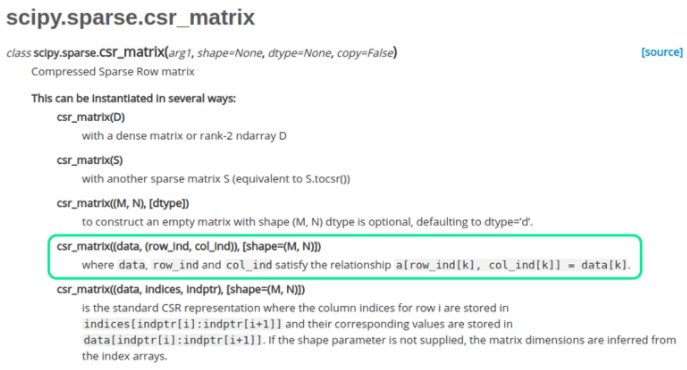

In [15]:
# 실습 - 위에 설명 토대로 만들어보기
from scipy.sparse import csr_matrix

num_user = data['user_id'].nunique()
num_artist = data['artist'].nunique()

csr_data = csr_matrix((data.play, (data.user_id, data.artist)), shape = (num_user, num_artist))
csr_data

<358869x291347 sparse matrix of type '<class 'numpy.longlong'>'
	with 17535578 stored elements in Compressed Sparse Row format>

## 7. MF 모델 학습하기

- 이전 스텝에서 설명한 Matrix Factorization 모델을 [implicit](https://github.com/benfred/implicit) 패키지를 사용하여 학습해보기
    - 'implicit' 패키지는 이전 스텝에서 설명한 암묵적(implicit) dataset을 사용한 다양한 모델을 굉장히 빠르게 학습할 수 있는 패키지
    - 이 패키지에 구현된 'als(AlternatingLeastSquares) 모델'을 사용할 예정
    - 'Matrix Factorization'에서 쪼개진 두 Feature Matrix를 한꺼번에 훈련하는 것은 잘 수렴하지 않기 때문에, 한쪽을 고정시키고 다른 쪽을 학습하는 방식을 번갈아 수행하는 AlternatingLeastSquares 방식이 효과적인 것으로 알려져 있음

In [16]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분. 학습 내용과는 무관
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
os.environ['MKL_NUM_THREADS'] = '1'

- AlternatingLeastSquares 클래스의 __init__ 파라미터 살펴보기
    - 1. factors: 유저와 아이템의 벡터를 몇 차원으로 할 것인지
    - 2. regularization: 과적합을 방지하기 위해 정규화 값을 얼마나 사용할 것인지
    - 3. use_gpu: GPU를 사용할 것인지
    - 4. iterations: epochs와 같은 의미. 데이터를 몇 번 반복해서 학습할 것인지
- 1, 4를 늘릴수록 학습데이터를 잘 학습하게 되지만, 과적합의 우려가 있으니 좋은 값을 찾아야 함

In [17]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors = 100, regularization = 0.01, use_gpu = False, iterations = 15, dtype = np.float32)

In [18]:
# als 모델은 input으로 (item x user 꼴의 matrix를 받기 때문에 Transpose해주기)
csr_data_transpose = csr_data.T
csr_data_transpose

<291347x358869 sparse matrix of type '<class 'numpy.longlong'>'
	with 17535578 stored elements in Compressed Sparse Column format>

In [19]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

- 모델 학습이 끝난 상황에서, 아래 2가지 사항을 살펴보기
    - 1. Zimin 벡터와 black eyed peas의 **벡터를 어떻게 만들고 있는지**
    - 2. 두 벡터를 **곱하면 어떤 값**이 나오는지

In [20]:
zimin, black_eyed_peas = user_to_idx['zimin'], artist_to_idx['black eyed peas']
zimin_vector, black_eyed_peas_vector = als_model.user_factors[zimin], als_model.item_factors[black_eyed_peas]

print('슝=3')

슝=3


In [21]:
zimin_vector

array([ 0.3810376 ,  0.40006334, -0.3526871 , -0.04929315,  0.5973659 ,
       -0.2798768 , -1.3033385 , -0.16758712,  0.6305813 ,  0.00978981,
        0.34841368,  0.9561538 , -0.4355594 ,  0.07940114, -0.6363159 ,
       -0.1024422 , -0.8497197 , -0.0236582 , -1.1646434 , -0.8117405 ,
       -0.24736385, -0.18596628,  1.1885672 ,  0.6175359 ,  0.3557084 ,
       -0.7745894 , -0.28619927, -0.65855837,  0.4272724 ,  0.5892818 ,
        0.10316562, -0.6680531 , -0.8156293 , -0.14704968, -0.30580908,
       -0.6871481 , -0.8832813 ,  0.01518549, -0.20898633, -0.49543408,
        1.023236  , -0.5881327 , -0.22429116, -1.1987327 ,  0.06350745,
        0.9369914 ,  0.1661689 , -0.01646573,  0.8395013 , -0.02355706,
        0.69519573,  0.70196414,  0.7613933 , -0.4471852 ,  0.20252043,
       -0.02161169,  0.47972247,  0.7431626 , -0.305608  , -0.5013598 ,
       -0.47184744, -0.58676344,  0.24500531, -0.2394042 ,  0.8555121 ,
        0.8055468 ,  0.10636999,  0.49933505, -0.611488  ,  0.46

In [22]:
black_eyed_peas_vector

array([ 7.36671407e-03,  5.25342813e-03, -2.94866599e-03, -2.29268172e-03,
        2.41230913e-02,  8.63954483e-04,  3.36623564e-03,  5.85333304e-03,
        8.93045589e-03,  9.81782097e-03,  1.19653915e-03,  3.18137929e-02,
        3.63807031e-03,  1.70168262e-02, -7.43193645e-03,  1.21322470e-02,
       -2.42706225e-03,  1.85292179e-03, -1.37415370e-02,  5.65242395e-03,
        1.76679213e-02, -3.88948154e-03,  3.44854370e-02,  1.92744043e-02,
       -4.83621238e-03, -5.16053755e-03, -1.20898737e-02,  6.92048576e-03,
        1.19420849e-02,  8.15135799e-03,  1.59047898e-02,  8.81921966e-04,
        3.24370712e-03, -1.28569556e-02,  5.62101975e-03,  8.62251472e-05,
        6.77429000e-03,  1.73282460e-03,  1.23330450e-03,  4.57378058e-03,
        2.58937590e-02, -7.33443478e-04,  5.63960662e-03, -7.14704441e-03,
       -1.12963486e-02, -1.04793068e-03,  1.01801315e-02,  4.01803758e-03,
        3.17606814e-02,  1.39038200e-02,  2.64599994e-02,  2.38507539e-02,
        2.24960987e-02,  

In [23]:
# zimin과 black_eyed_peas를 내적하는 코드
np.dot(zimin_vector, black_eyed_peas_vector)

0.41278368

- 1이 나와야 될 것 같은데 한참 낮은 수치인 0.44 정도가 나옴
- factors를 늘리거나 iterator를 늘려야 할 것
- 이후 진행되는 내용은 일단 이렇게 학습된 모델 사용
- Q9. 만약 이 두 수치를 늘려 1에 가깝게 나왔다면 이 모델이 잘 학습되었다고 볼 수 있을까?
- A9. 아직 검증되지 않았음. 학습 데이터에 대해서 fitting은 되었지만 아직 보지 못한 데이터에 대한, 예를 들어 queen을 선호할지에 대한 예측을 잘할지 못할지는 검증하지 않았기 때문

In [24]:
# 모델이 queen에 대한 선호도를 어떻게 예측할지 확인
queen = artist_to_idx['queen']
queen_vector = als_model.item_factors[queen]
np.dot(zimin_vector, queen_vector)

0.29365095

- Q10. queen에 대한 선호도를 예측한 결과를 어떻게 해석하면 좋을까? 사용자와 아티스트 벡터 내적이 0.5를 기준으로 그보다 높으면 모델이 선호한다고 판단했다고 말할 수 있는가?
- A10. 모델을 만드는 사람이 정하기 나름. 객관적인 지표로 만들어거 기준을 정할 수도 있고, 도메인 경험을 통해 정할 수도 있음. 추천 시스템은 다른 머신러닝 task보다 객관적인 평가가 어려운 분야. 사람을 도통 알 수 없기 때문에 객관적인 지표 정하기 어렵기 때문
- 모델을 만들려면 데이터에 대한 이해도가 높아야 하는데 추천시스템에서 사용하는 데이터는 사람에 대한 데이터(따라서 이런 부분에 대해 잘 알 수 없는? 분야)

## 8. 비슷한 아티스트 찾기 + 유저에게 추천하기

### 비슷한 아티스트 찾기

- 'AlternatingLeastSquares' 클래스에 구현되어 있는 'similar_items' 메서드를 통하여 비슷한 아티스트 앚기
- 처음으로는 'coldplay' 찾아보기

In [25]:
# (아티스트의 id, 유사도) Tuple로 반환
favorite_artist = 'coldplay'
artist_id = artist_to_idx[favorite_artist]
similar_artist = als_model.similar_items(artist_id, N = 15)
similar_artist

[(62, 1.0),
 (277, 0.9887845),
 (5, 0.98035026),
 (28, 0.9774718),
 (473, 0.9763677),
 (217, 0.969549),
 (247, 0.96697927),
 (418, 0.9645504),
 (490, 0.9622297),
 (910, 0.95853037),
 (694, 0.94927424),
 (268, 0.940909),
 (1018, 0.9407417),
 (55, 0.9388434),
 (782, 0.9349391)]

In [26]:
# 아티스트의 id를 다시 아티스트의 이름으로 매핑시켜주기
# artist_to_idx를 뒤집어, index로부터 artist 이름을 얻는 dict 생성
idx_to_artist = {v:k for k,v in artist_to_idx.items()}
[idx_to_artist[i[0]] for i in similar_artist]

['coldplay',
 'muse',
 'red hot chili peppers',
 'the killers',
 'placebo',
 'radiohead',
 'the beatles',
 'u2',
 'oasis',
 'nirvana',
 'foo fighters',
 'pink floyd',
 'the smashing pumpkins',
 'arctic monkeys',
 'the white stripes']

In [27]:
# 위의 코드를 함수로 만들고 확인
def get_similar_artist(artist_name: str):
    artist_id = artist_to_idx[artist_name]
    similar_artist = als_model.similar_items(artist_id)
    similar_artist = [idx_to_artist[i[0]] for i in similar_artist]
    return similar_artist
print("슝=3")

슝=3


In [28]:
# 힙합 2pac 확인
get_similar_artist('2pac')

['2pac',
 'nas',
 'notorious b.i.g.',
 'dr. dre',
 'the game',
 'snoop dogg',
 'jay-z',
 '50 cent',
 'busta rhymes',
 'dmx']

- 힙합의 경우, 마니아들이 더 많아서 더 잘 추천되는 것으로 생각됨
- Q11. 마니아는 데이터상에서 표현될 때 어떤 특징을 가질까?
- A11. 마니아들은 특정 장르의 아티스트들에게로 선호도가 집중되고, 다르 장르의 아티스트들과는 선호도가 낮게 나타날 것. 이런 마니아들의 존재로 인해 같은 장르의 아티스트들의 벡터들도 더 가까워져서 get_similar_artist시 장르별 특성이 두드러지게 될 것

In [29]:
# lady gaga의 경우 여자 아티스트들이 추천되고 있음
get_similar_artist('lady gaga')

['lady gaga',
 'britney spears',
 'rihanna',
 'katy perry',
 'beyoncé',
 'the pussycat dolls',
 'justin timberlake',
 'christina aguilera',
 'kylie minogue',
 'kelly clarkson']

### 유저에게 아티스트 추천하기

- 'AlternatingLeastSquares' 클래스에 구현되어 있는 'recommend' 메서드를 통하여 좋아할만한 아티스트 추천받기
- 'filter_already_liked_items'는 유저가 이미 평가한 아이템은 제외하는 Argument

In [30]:
user = user_to_idx['zimin']
# recommend에서는 user*item CSR Matrix 받음
artist_recommended = als_model.recommend(user, csr_data, N = 20, filter_already_liked_items = True)
artist_recommended

[(274, 0.35230052),
 (409, 0.34787),
 (627, 0.34727526),
 (24, 0.34475133),
 (724, 0.33533183),
 (247, 0.33458012),
 (5, 0.3342449),
 (277, 0.32988223),
 (28, 0.32492402),
 (564, 0.3210165),
 (35, 0.31569126),
 (217, 0.31193948),
 (418, 0.31174606),
 (355, 0.303343),
 (55, 0.29954612),
 (352, 0.29650506),
 (75, 0.29365093),
 (434, 0.29306298),
 (694, 0.2920552),
 (503, 0.29186508)]

In [31]:
[idx_to_artist[i[0]] for i in artist_recommended]

['michael jackson',
 'amy winehouse',
 'maroon 5',
 'jack johnson',
 'lily allen',
 'the beatles',
 'red hot chili peppers',
 'muse',
 'the killers',
 'kanye west',
 'john mayer',
 'radiohead',
 'u2',
 'madonna',
 'arctic monkeys',
 'linkin park',
 'queen',
 'eminem',
 'foo fighters',
 'green day']

- 'AlternatingLeastSquares' 클래스에 구현된 'explain' 메소드를 사용하면 기록을 남긴 데이터 중 **이 추천에 기여한 정도**를 확인할 수 있음

In [34]:
michael_jackson = artist_to_idx['michael jackson']
explain = als_model.explain(user, csr_data, itemid = michael_jackson)

- 이 method는 추천한 콘텐츠의 점수에 기여한 다르 콘텐츠와 기여도(합이 콘텐츠의 점수가 됨)를 반환
- 어떤 아티스트들이 이 추천에 얼마나 기여하고 있는가

In [35]:
[(idx_to_artist[i[0]], i[1]) for i in explain[1]]

[('black eyed peas', 0.15699438682531358),
 ('coldplay', 0.12432809482436152),
 ('jason mraz', 0.07077870316282824),
 ('beyonce', 0.0034181707236019),
 ('maroon5', 0.0003413014980735288)]

- filter_already_liked_items = True로 했는데 앞에 이미 평가한 아이템이 나오는 버그 발생. implicit 버전 0.4.2에서 생긴 것
- 오픈 소스 생태계에서는 누구든 이런 [문제점을 지적](https://github.com/benfred/implicit/issues/365)하고 [Pull Request](https://github.com/benfred/implicit/pull/389) 통해 수정을 제안할 수 있음
- 많이 사용하는 Tensorflow나 numpy.pandas도 여러 가지 작은 버그들이 있음
- 이런 유명한 패키지의 오류를 고쳐서 Pull Request를 하여 Contribute한다면 좋은 이력이 되기도 함
- 모델이 추천한 20개 중 몇개를 실제로 선호하는지 계산하여 모델의 객관적인 지표 만들 수 있을 것
- 자세한 방법은 [이쪽](https://danthetech.netlify.app/DataScience/evaluation-metrics-for-recommendation-system)을 참고

### 마무리

- 추천시스템에서 Baseline으로 많이 사용되는 MF를 통해 유저에게 아티스트를 추천해보았음
- 이제 추천시스템 관련 task에서 기본 모델 만들 수 있음
- 그러나 우리가 만든 모델은 몇 가지 아쉬운 점이 있음
    - 1. 유저, 아티스트에 대한 Meta 정보를 반영하기 쉽지 않음. 연령대별로 음악 취향이 굉장히 다를 것
    - 2. 유저가 언제 play 했는지를 반영하기 쉽지 않음. 10년 전에 즐겨듣던 아티스트와 지금 즐겨듣는 아티스트를 비교
- 이러한 이유와 딥러닝의 발전으로 MF 이외의 모델 구조도 많이 연구/사용되고 있음
- 하지만 어떤 추천 모델도 핵심은 MF와 비슷
- 유저와 아이템에 대한 벡터를 잘 학습하여 취향에 맞게(유저에 맞게) 아이템을 보여주거나(Retrieval) 걸러내는(Filtering) 역할